Для N = 5
ОМП ближе для первой координаты: 92
ОМП ближе для второй координаты: 104
ОМП ближе в общем смысле: 103

Для N = 10
ОМП ближе для первой координаты: 105
ОМП ближе для второй координаты: 114
ОМП ближе в общем смысле: 112

Для N = 20
ОМП ближе для первой координаты: 106
ОМП ближе для второй координаты: 122
ОМП ближе в общем смысле: 121

Для N = 50
ОМП ближе для первой координаты: 100
ОМП ближе для второй координаты: 105
ОМП ближе в общем смысле: 107

Для N = 100
ОМП ближе для первой координаты: 122
ОМП ближе для второй координаты: 73
ОМП ближе в общем смысле: 114



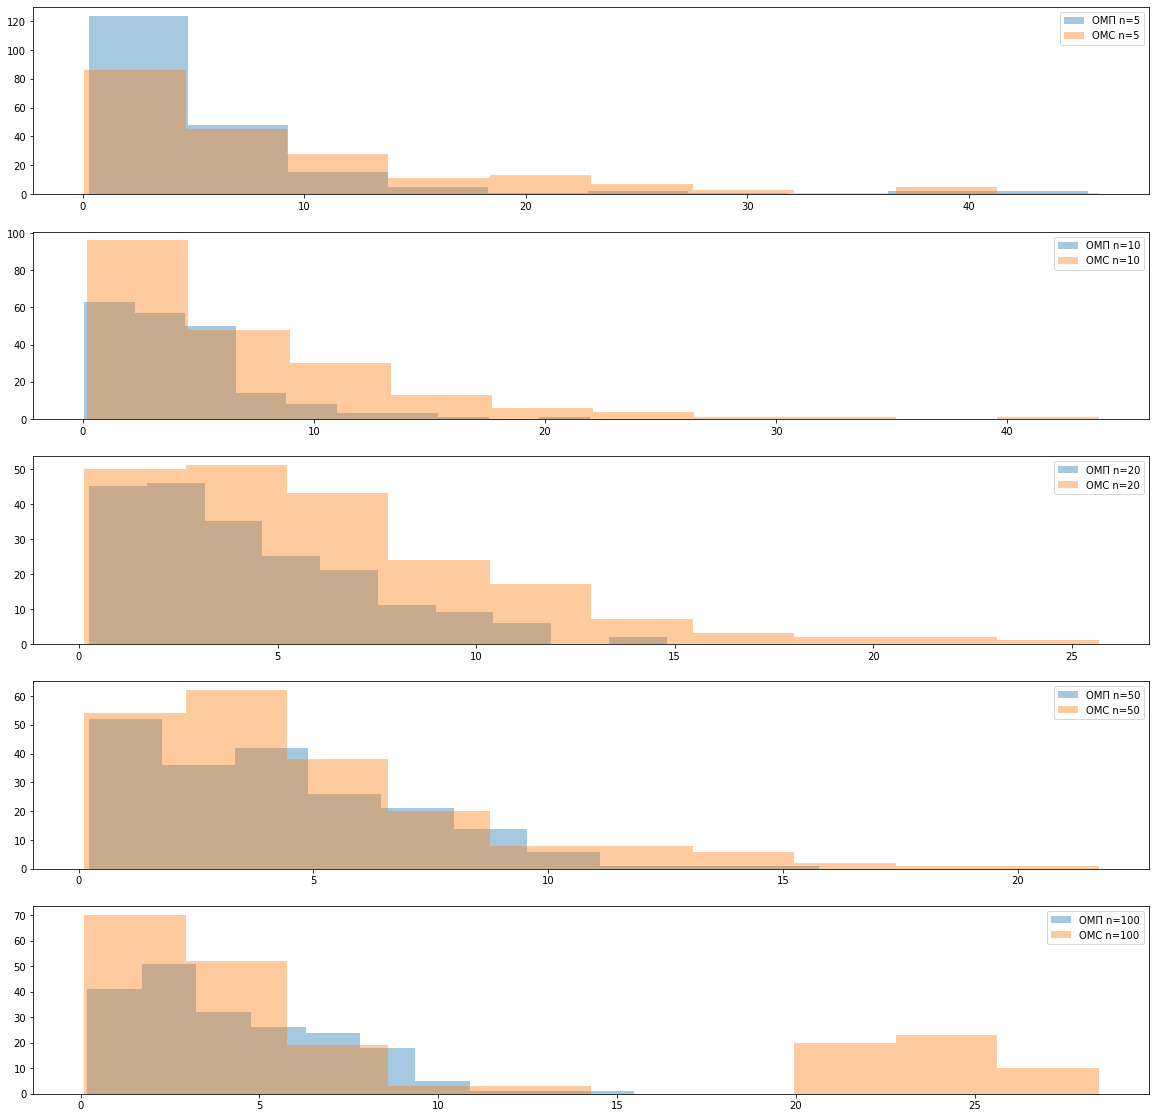

In [5]:
from scipy.stats import gamma
import numpy as np
from scipy.optimize import minimize
import seaborn as sns 
import matplotlib.pyplot as plt

def Lnll(p,x,n):
    function = 0
    for i in range(n):
        function +=  np.log(gamma.pdf(x[i], p[0], scale = p[1]))
    return function

def D(p, x, n):
    x.sort()
    function = gamma.cdf(x[0], p[0], scale = p[1])
    for i in range (n-1):
        function *= (gamma.cdf(x[i+1], p[0], scale = p[1]) - gamma.cdf(x[i], p[0], scale = p[1]))
    function *= 1 - gamma.cdf(x[n-1], p[0], scale = p[1])
    return function

plt.figure( figsize= (20,20))
k = 200
p = [ 1 , 3 ]
N = [5,10,20,50,100]
for i in range(5):
    ml = []
    md = []
    MLE_1= 0
    MLE_2 = 0
    MLE_closer = 0
    for j in range(k):
        X = gamma.rvs( p[0], scale = p[1], size = N[i])
        ml.append( minimize( lambda p1: (-1)*Lnll(p1,X,N[i]),[np.mean(X),np.mean(X)], method = "Nelder-Mead").x) #ОМП
        md.append( minimize( lambda p1: (-1)*D(p1,X,N[i]), [np.mean(X),np.mean(X)], method = "Nelder-Mead").x) #ОМС
    for j in range(k):
        MLE_1 += ( np.abs(ml[j][0] - p[0])<np.abs( md[j][0] - p[0])) 
        MLE_2 += ( np.abs(ml[j][1] - p[1])<np.abs( md[j][1] - p[1]))
        MLE_closer += (np.sqrt(( ml[j][0] - p[0])**2 + (ml[j][1] - p[1])**2) < np.sqrt(( md[j][0] - p[0])**2+( md[j][1] - p[1])**2))
    print("Для N = "+str(N[i]))
    print("ОМП ближе для первой координаты: "+str(MLE_1))
    print("ОМП ближе для второй координаты: "+str(MLE_2))
    print("ОМП ближе в общем смысле: "+str(MLE_closer))
    print()
    for j in range(k):
        ml[j] = np.sqrt(N[i]) * np.sqrt(( ml[j][0] - p[0])**2+( ml[j][1] - p[1])**2)
        md[j] = np.sqrt(N[i]) * np.sqrt(( md[j][0] - p[0])**2+( md[j][1] - p[1])**2)
    plt.subplot(5, 1, i+1)
    sns.distplot( ml, bins = 10 , kde = False, label = ("ОМП n="+str(N[i])))
    sns.distplot( md, bins = 10 , kde = False, label = ("ОМС n="+str(N[i])))
    plt.legend()
plt.show()